# ANALISI SULLA QUALITA' DELLA VITA NEI PAESI DEL MONDO

# INTRODUZIONE

La qualità della vita di ogni persona dipende da diversi fattori che facilmente influenzano le nostra abitudini. 

Ci chiediamo spesso se il posto in cui viviamo è quello giusto per noi, se esso sta evolvendo e sta migliorando in determinati aspetti che possano influenzare il nostro trascorrere del tempo e se esistono altri posti nel mondo in cui potremmo trovare la nostra confort zone.

L'obiettivo di questo progetto è proprio quello di analizzare indici che influenzano la qualità della vita in un paese, analizzare quali nazioni sono le migliori in determinati indici, quali stanno evolvendo nel corso degli anni etc...

Questo progetto può risultare utile nel capire in quali nazioni si vive meglio, in quali nazioni determinati indici sono ottimi o sono critici o capire quali fattori migliorare o stanno migliorando nel passare degli anni nelle varie nazioni, capendo la correlazione che c'è tra certi fattori e la qualità della vita

Il progetto si pone come obiettivo anche quello di cercare di prevedere quali saranno i futuri indici di qualità della vita, come certi dati influenzano previsioni future o possibili classificazioni di nazioni 



# ANALISI DEL DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## EXPLORATIV DATA ANALYSIS SUL DATASET


Questo dataset contiene indici di qualità della vita per vari paesi dal mondo, nei vari anni. Sulla base di questi parametri ogni anno è calcolato poi il ranking  in un classifica delle nazioni del mondo. 

Nel dataset troveremo ogn riga che esprime i vari parametri per ogni nazione  per l’anno analizzato. Le colonne del dataset sono:


- **Ranking**:  il ranking globale della nazione in quell'anno basato sull'indice di qualità della vita

- **Nazione**: il nome della nazione 

- **Indice di qualità di vita**: un indice composto che valuta in totale la qualità della vita nella nazione

- **Purchasing power index**: misura il potere di acquisto relativo ad un consumatore
medio rispetto a New York, base=100 


- **Indice di sicurezza**: indicatore che misura il livello di sicurezza percepito dai cittadini e la loro tranquillità in un determinato paese


- **Indice di sanità**: indice della qualità e della accessibilità alla sanità in un paese (cattura molteplici dimensioni come la qualità delle cure, la soddisfazione dei pazienti o l'efficienza dei processi.)


- **Costo della vita**: misura i costi della vita (rispetto a New York, base = 100)


- **Property price**:  indicatore economico che riflette la situazione del mercato immobiliare di un paese, fornendo una misura del valore degli immobili in un determinato momento. è ottenuto dividendo il prezzo medio di un immobile per il reddito medio nella nazione


- **Tempo speso nel traffico**:  il tempo medio speso a causa del traffico


- **Indice di inquinamento**: quantità di inquinamento medio nella nazione


- **Indice climatico**: condizioni climatiche per la nazione (higher = più alto)


- **Anno**: anno dove le metriche sono state estratte



In [2]:
# creo un dataframe a partire dall'indice csv
data = pd.read_csv("./quality_of_life_indices_by_country.csv")


# rinomino le coloonne per evitare problemi nell'utilizzo dei nomi con spaziature negli algoritmi di regressione
data.rename(columns={
    'Quality of Life Index': 'Quality_of_Life_Index',
    'Purchasing Power Index': 'Purchasing_Power_Index',
    'Safety Index': 'Safety_Index',
    'Health Care Index': 'Health_Care_Index',
    'Cost of Living Index': 'Cost_of_Living_Index',
    'Property Price to Income Ratio': 'Property_Price_to_Income_Ratio',
    'Traffic Commute Time Index': 'Traffic_Commute_Time_Index',
    'Pollution Index': 'Pollution_Index',
    'Climate Index': 'Climate_Index',
}, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality_of_Life_Index           1495 non-null   float64
 3   Purchasing_Power_Index          1495 non-null   float64
 4   Safety_Index                    1495 non-null   float64
 5   Health_Care_Index               1495 non-null   float64
 6   Cost_of_Living_Index            1495 non-null   float64
 7   Property_Price_to_Income_Ratio  1495 non-null   float64
 8   Traffic_Commute_Time_Index      1495 non-null   float64
 9   Pollution_Index                 1495 non-null   float64
 10  Climate_Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

Il dataset ha **1495 entries** e nessuna presenta valorI *Null*. 

Un esempio del dataset lo possiamo ottenere mostrandone le prime 10 righe: 


In [3]:

data.drop("Climate_Index",axis=1,inplace=True) # elimino la colonna Climate Index perche noto che piena di  - (pulizia del dataset)

data.head(10)


Rank        Country  Quality_of_Life_Index  Purchasing_Power_Index  \
0     1    Switzerland                  222.9                   146.5   
1     2        Germany                  195.9                   111.8   
2     3         Sweden                  193.9                   110.9   
3     4  United States                  192.5                   126.1   
4     5        Finland                  190.2                   101.2   
5     6        Denmark                  190.2                   105.7   
6     7        Austria                  182.6                   104.6   
7     8      Australia                  180.8                   110.4   
8     9         Canada                  177.6                   105.1   
9    10    New Zealand                  175.5                    91.0   

   Safety_Index  Health_Care_Index  Cost_of_Living_Index  \
0          73.2               66.3                 126.0   
1          71.5               75.6                  76.3   
2          57.9               76.3                  82.9   
3          50.0               67.8                  76.5   
4          70.5               69.4                  89.7   
5          74.3               79.3                 100.6   
6          73.8               78.4                  76.9   
7          57.8               71.9                  99.3   
8          62.5               69.6                  81.8   
9          60.2               72.6                  93.7   

   Property_Price_to_Income_Ratio  Traffic_Commute_Time_Index  \
0                             7.3                        25.6   
1                             6.6                        31.1   
2                             9.2                        26.9   
3                             2.6                        36.0   
4                             7.0                        33.2   
5                             5.0                        27.8   
6                             9.6                        25.9   
7                             7.1                        36.2   
8                             5.5                        38.9   
9                             5.8                        28.1   

   Pollution_Index  Year  
0             24.1  2015  
1             28.3  2015  
2             15.1  2015  
3             31.4  2015  
4             14.9  2015  
5             31.8  2015  
6             34.0  2015  
7             21.6  2015  
8             27.3  2015  
9             17.6  2015

### ANALISI STATISTICA UNIVARIATA

Alcuni dei valori medi degli indici tra le varie nazioni nel periodo 2014/2024:

In [4]:

stats = data.describe()
index = ['mean','min','max','std']
stats.loc[index]

Rank  Quality_of_Life_Index  Purchasing_Power_Index  Safety_Index  \
mean  38.733779             134.156656               66.804615     60.104682   
min    1.000000             -53.000000                3.300000     14.700000   
max   87.000000             285.800000              210.000000     88.100000   
std   22.931071              40.828402               33.282943     13.776743   

      Health_Care_Index  Cost_of_Living_Index  Property_Price_to_Income_Ratio  \
mean          65.211037             53.440401                       12.876856   
min           28.300000             17.600000                        2.600000   
max           88.400000            138.200000                      202.100000   
std           10.150324             20.573712                        8.475637   

      Traffic_Commute_Time_Index  Pollution_Index  
mean                   35.792508        52.431237  
min                    11.800000        11.500000  
max                    65.200000        96.600000  
std                     7.905525        20.660280

Ottenere la media dei ranking nei vari anni è di per se un valore inutile. 

Da questi indici è utile invece vedere che tra tutti i dati raccolti l'indice di qualità medio di vita è . Dalla deviazione standard capiamo che il range del valore del 'Quality of life index' è tra circa 90 e circa 180, quindi l'indice media di qualità della vita tra le varie nazioni nei vari anni non è pessimo. 



In [5]:
# data_grouped_by_year = data.groupby("Year").describe()
# data_grouped_by_year.reset_index(inplace=True)
# Questo lo potrei plottare per vedere come negli anni se si è alzato o abbassato l'indice di qualità della vita



### ANLISI VARIAZIONE DEL RANKING NEGLI ANNI DELLE VARIE NAZIONI

Come si stanno evolvendo le top nazioni d'europa negli Anni?

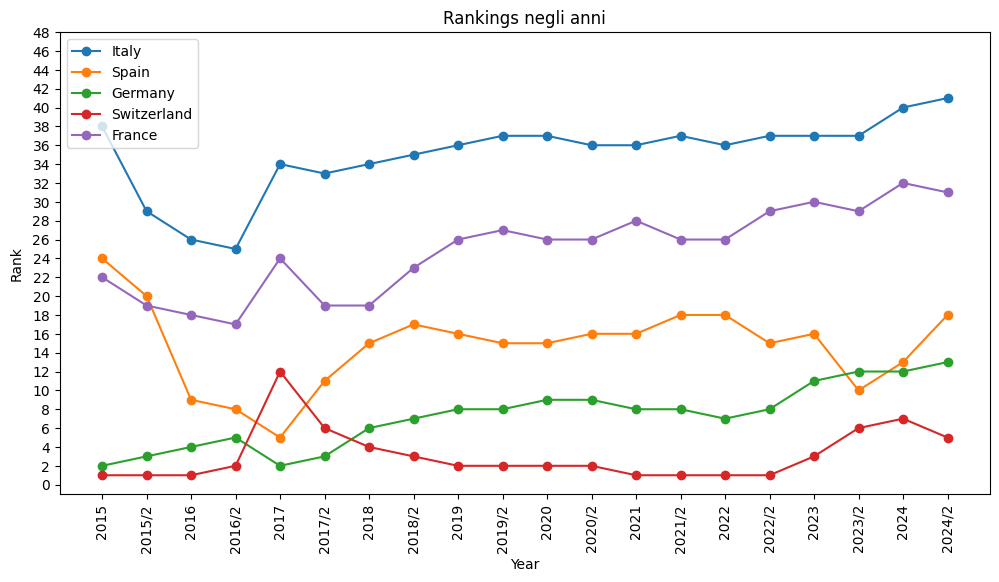

In [6]:
nations = ['Italy', 'Spain', 'Germany','Switzerland','France']

def plot_nations_rank_during_year(data,nations):
    plt.figure(figsize=(12,6))
    for n in nations:
        new_data = data.where((data['Country'].astype(str)==n)).dropna()
        plt.plot(new_data['Year'],new_data['Rank'],label=n, marker='o' )
      
      
    plt.title("Rankings negli anni")
    plt.xlabel('Year')
    plt.ylabel("Rank",labelpad=6.0)
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0,50,2)) 
    plt.legend()
    plt.show()


plot_nations_rank_during_year(data,nations)


Notiamo che:

L'**Italia** negli anni sta peggiorando la sua posizione in classifica, così come la Francia e la Germania. La Spagna ha avuto una leggiore flessione tra il 2022 ed il 2023 (a causa di cosa?), mentre la Svizzera è sempre stata nelle prime posizioni della classifica. 

Da questo plot notiamo inoltre che L'Italia non è mai stata in classifica sopra queste top 5 potenze europee analizzate.

Come si stanno evolvendo i vari indici negli anni in Italia?

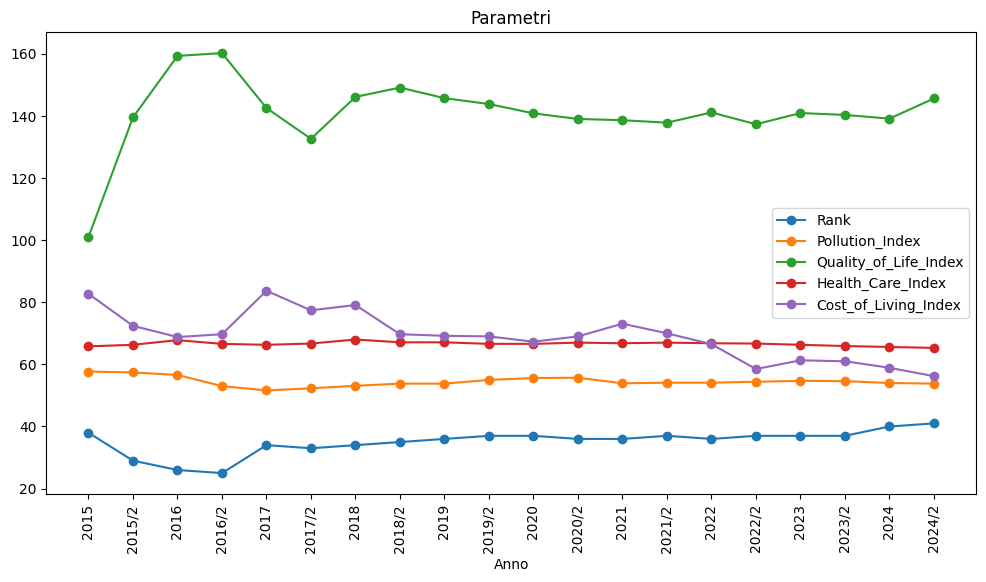

In [7]:
italy_data = data.where((data['Country'].astype(str)=='Italy')).dropna()

ylabel = ['Rank','Pollution_Index', 'Quality_of_Life_Index','Health_Care_Index','Cost_of_Living_Index']

def plot_indexes_of_country(data,country,indexes):

    country_data = data.where((data['Country'].astype(str)==country)).dropna()
    ylabel = indexes


    plt.figure(figsize=(12,6))
    plt.title("Parametri")
    plt.xlabel('Anno')

    for y in ylabel:
        plt.plot(country_data['Year'],country_data[y],label=y, marker='o' )
         #plt.ylabel("Rank",labelpad=6.0)
        plt.xticks(rotation=90)
    
    plt.legend()
    plt.show()


# Plotto solo alcuni degli indici più importanti
#ylabel = ['Rank','Traffic Commute Time Index','Pollution Index','Climate Index', 'Quality of Life Index', 'Purchasing Power Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio']

plot_indexes_of_country(data,'Italy',ylabel)



# supergiù tutti gli indici continuano a rimanere nella media
# è diminuito il costo della vita e questo può essere un motivo del perchè è salito in classifica l'italia

Analizzando queste curve dei parametri notiamo che, per quanto riguarda l'Italia:

-  sta peggiorando la sua posizione in classifica nei vari anni
-  l'indice di inquinamento non appare in media subire variazioni
- il costo della vita sta scendendo ed ha avuto il suo picco nel 2017
- l'indice di qualità della vita non è stato mai alto come nel 2016 e negli ultimi anni non sta subendo grandi variazioni


### ANALISI MULTIVARIATA

Analizziamo adesso le relazioni che ci sono tra le varie features del dataset per il variare di una variabile possa influenzare un altra e  scoprire eventuali dipendeneze.

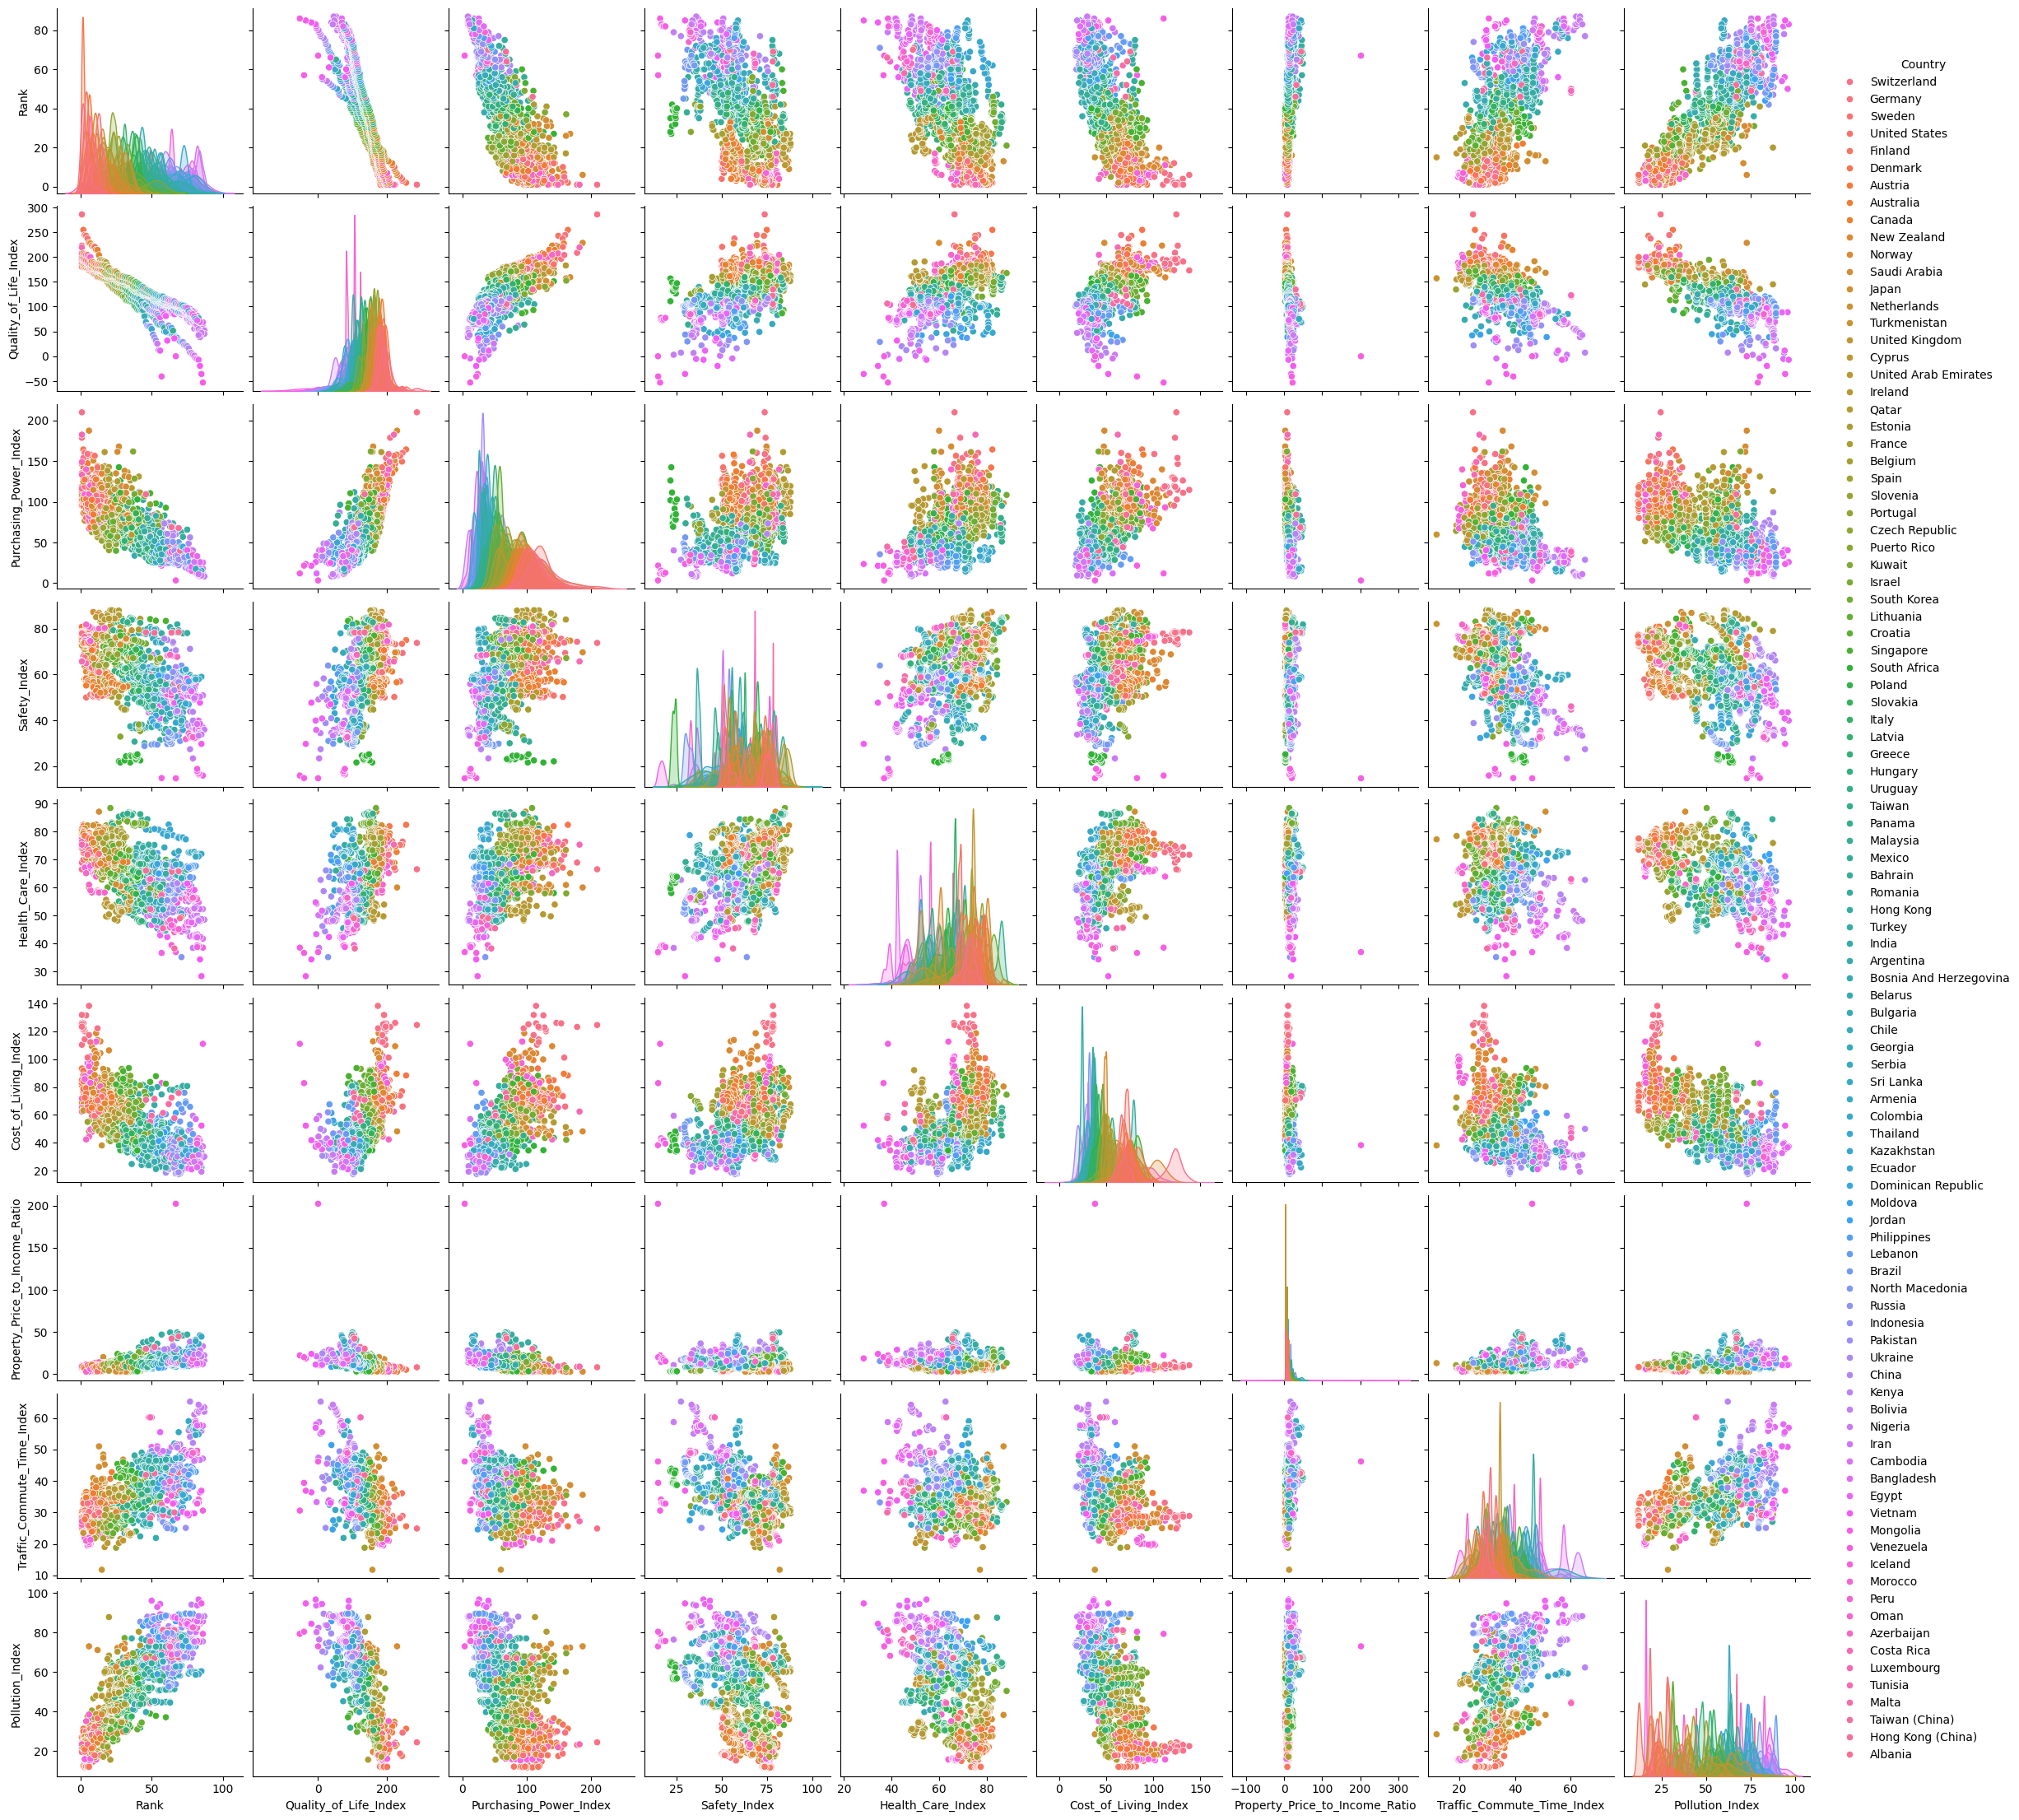

In [8]:


sns.pairplot(data,hue='Country')
plt.show()

# Sulla diagonale abbiamo la variabile rispetto a se stessa e la cella mostra la sua distribuzion
# In ogni altra cella abbiamo la distribuzione relativa delle due variabili in X e Y della cella stessa, rappresentata tramite scatterplot (utile per investigazione delle correlazioni)
# i punti sono colorati in base alla variabile categoriale 'Country'


Da questa scatter matrix notiamo che c'è certamente correlazione tra alcune variabili.

Tra le scatter matrix in cui possiamo fare deduzioni più evidenti ci sono:

- l'indice di qualità della vita (e quindi il ranking) e banalmente dipendente da tutti gli altri parametri del dataset
- l'healt care index notiamo essere correlato fortemente con l'indice di sanità
- l'indice di inquinamento è certamente non correlato con il costo medio di proprietà
- è interessante notare come il tempo medio impiegato nel traffico sia fortemente correlato con l'indice di inquinamento




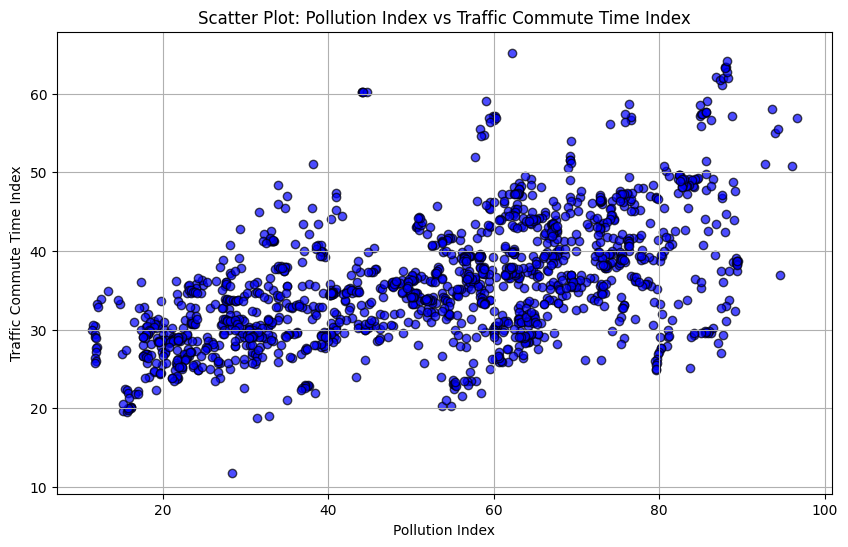

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Pollution_Index'], data['Traffic_Commute_Time_Index'], alpha=0.7, c='blue', edgecolors='k')
plt.title('Scatter Plot: Pollution Index vs Traffic Commute Time Index')
plt.xlabel('Pollution Index')
plt.ylabel('Traffic Commute Time Index')
plt.grid(True)
plt.show()

Si nota rappresentado i dati in uno spazio 2d che nelle nazioni dove è alto il tempo speso in media in una giornata nel traffico è alto l'indice di inquinamento, dovuto sicuramente alle emissioni delle autovetture ed allo scarso utilizzo dei mezzi pubblici


Diamo adesso dei dati oggettivi a queste correlazioni tramite l'Indice di Correlazione di Pearson:

In [10]:
index = ['Country','Year']
data_without_qualitative_value = data.drop(index, axis=1)
data_without_qualitative_value.corr(method='pearson')

Rank  Quality_of_Life_Index  \
Rank                            1.000000              -0.911429   
Quality_of_Life_Index          -0.911429               1.000000   
Purchasing_Power_Index         -0.808582               0.779720   
Safety_Index                   -0.526384               0.532045   
Health_Care_Index              -0.568314               0.552464   
Cost_of_Living_Index           -0.692855               0.607517   
Property_Price_to_Income_Ratio  0.507378              -0.497310   
Traffic_Commute_Time_Index      0.631344              -0.608260   
Pollution_Index                 0.856016              -0.812679   

                                Purchasing_Power_Index  Safety_Index  \
Rank                                         -0.808582     -0.526384   
Quality_of_Life_Index                         0.779720      0.532045   
Purchasing_Power_Index                        1.000000      0.423047   
Safety_Index                                  0.423047      1.000000   
Health_Care_Index                             0.524878      0.384079   
Cost_of_Living_Index                          0.701612      0.391775   
Property_Price_to_Income_Ratio               -0.413017     -0.092799   
Traffic_Commute_Time_Index                   -0.389116     -0.474271   
Pollution_Index                              -0.597118     -0.395983   

                                Health_Care_Index  Cost_of_Living_Index  \
Rank                                    -0.568314             -0.692855   
Quality_of_Life_Index                    0.552464              0.607517   
Purchasing_Power_Index                   0.524878              0.701612   
Safety_Index                             0.384079              0.391775   
Health_Care_Index                        1.000000              0.518272   
Cost_of_Living_Index                     0.518272              1.000000   
Property_Price_to_Income_Ratio          -0.112484             -0.209981   
Traffic_Commute_Time_Index              -0.197911             -0.361445   
Pollution_Index                         -0.479726             -0.636214   

                                Property_Price_to_Income_Ratio  \
Rank                                                  0.507378   
Quality_of_Life_Index                                -0.497310   
Purchasing_Power_Index                               -0.413017   
Safety_Index                                         -0.092799   
Health_Care_Index                                    -0.112484   
Cost_of_Living_Index                                 -0.209981   
Property_Price_to_Income_Ratio                        1.000000   
Traffic_Commute_Time_Index                            0.370211   
Pollution_Index                                       0.352226   

                                Traffic_Commute_Time_Index  Pollution_Index  
Rank                                              0.631344         0.856016  
Quality_of_Life_Index                            -0.608260        -0.812679  
Purchasing_Power_Index                           -0.389116        -0.597118  
Safety_Index                                     -0.474271        -0.395983  
Health_Care_Index                                -0.197911        -0.479726  
Cost_of_Living_Index                             -0.361445        -0.636214  
Property_Price_to_Income_Ratio                    0.370211         0.352226  
Traffic_Commute_Time_Index                        1.000000         0.567086  
Pollution_Index                                   0.567086         1.000000

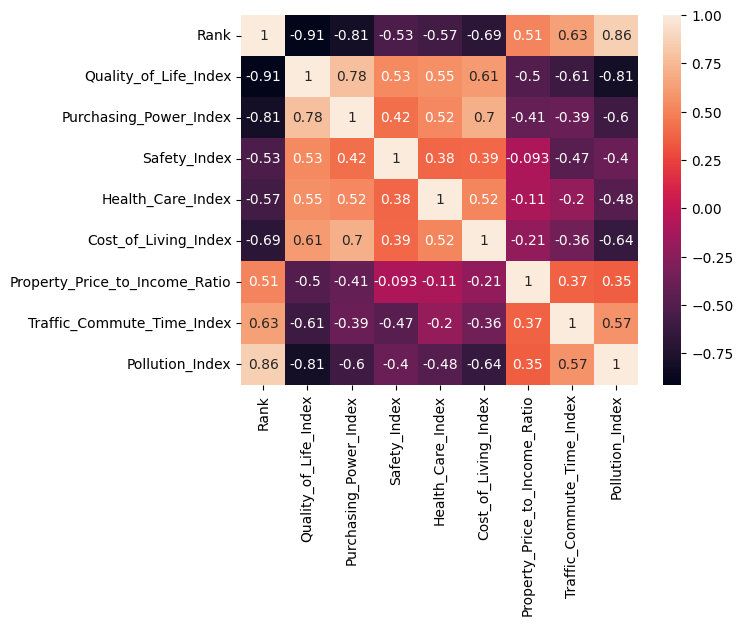

In [11]:

sns.heatmap(data_without_qualitative_value.corr(), annot=True) #annot=True serve a stampare i valori di correlazione
plt.show()


Questi dati ci trasformano in valori matematici la prima analisi generale che avevamo fatto vedendo le varie scatter matrix.


L'Indice di Correlazione di Pearson viene così interpetato:
- -1: forte anticorrelazione tra le variabili (all'aumentare di una l'altra diminuisce)
- 0: variabili che non sono correlate
- -1: forte correlazione tra le variabili (all'aumentare di una l'altra aumenta)

Notiamo quindi che:
- l'indice di qualità della vita è fortemente correlato a fattori come la potenza economica di un paese, indice di sicurezzza e di sanità ed il costo della vita, mentre è anticorrelato a fattori come il costo delle proprietà, il tempo medio speso nel traffico e l'indice di inquinamento

- l'indice di inquinamento è fortemente correlato a fattori come il tempo speso mediamente nel traffico, mentre bassamente anticorrelato a tutti gli altri indici 


- alcune coppie di variabili che non sembrano avere nessuna correlazione tra di loro, come il tempo medio speso nel traffico con l'indice di sanità.




## ANALISI INFERENZIALE

### REGRESSIONE PER ANALIZZARE DIPENDENZA TRA LE FEATURE

Possiamo utilizzare la regressione per capire che relazione c'è tra una determinata variabile dipendente ed altre variabili indipendenti.

Studiamo noi la relazione che c'è tra la variabile dipendente 'Indice di qualità della vita' e tutte le altre variabili indipendenti. 

Tramite la regressione e i coefficienti trovati possiamo capire come vari la Qualità della vita al variare delle altre variabili.


In [12]:
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [13]:
# faccio prima standardizzazione dei dati così li utilizzo in tutti i modelli di regressione

# Seleziona solo le colonne numeriche da standardizzare
numeric_columns = ['Rank','Quality_of_Life_Index', 'Purchasing_Power_Index', 'Safety_Index',
'Health_Care_Index', 'Cost_of_Living_Index', 'Property_Price_to_Income_Ratio',
'Traffic_Commute_Time_Index', 'Pollution_Index'
]



# standardizziamo i dati per costruire un regressione lineare giusta e non influenzata dai range dei valori
standardized_data = data.drop(['Country','Year'], axis=1).copy()
scaler = StandardScaler()
scaler.fit(standardized_data[numeric_columns])
standardized_data[numeric_columns] = scaler.transform(standardized_data[numeric_columns])


In [14]:
def linear_regression(X, y,data):
    # Costruisce la formula dinamicamente: 'y ~ x1 + x2 + x3 + ...'
    independent_vars = ' + '.join(y)
    formula = f'{X} ~ {independent_vars}'
    
    # Esegue la regressione
    model = ols(formula, data).fit()  # ordinary least squares

    
    
    return model


In [15]:
# posso fare la stessa cosa prendendo come variabili dipendente l'indice di qualità della vita
linear_regression_model_for_quality_index = linear_regression('Quality_of_Life_Index', ['Purchasing_Power_Index', 'Safety_Index', 'Health_Care_Index', 'Cost_of_Living_Index', 'Property_Price_to_Income_Ratio', 'Traffic_Commute_Time_Index', 'Pollution_Index'], standardized_data)
linear_regression_model_for_quality_index.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Quality_of_Life_Index   R-squared:                       0.856
Model:                               OLS   Adj. R-squared:                  0.855
Method:                    Least Squares   F-statistic:                     1264.
Date:                   Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                           14:47:52   Log-Likelihood:                -671.94
No. Observations:                   1495   AIC:                             1360.
Df Residuals:                       1487   BIC:                             1402.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.752e-16      0.010   1.78e-14      1.000      -0.019       0.019
Purchasing_Power_Index             0.3859      0.016     24.219      0.000       0.355       0.417
Safety_Index                       0.1313      0.012     10.729      0.000       0.107       0.155
Health_Care_Index                  0.1149      0.013      9.164      0.000       0.090       0.140
Cost_of_Living_Index              -0.1254      0.015     -8.151      0.000      -0.156      -0.095
Property_Price_to_Income_Ratio    -0.1412      0.012    -12.124      0.000      -0.164      -0.118
Traffic_Commute_Time_Index        -0.1174      0.013     -8.810      0.000      -0.144      -0.091
Pollution_Index                   -0.4385      0.015    -28.840      0.000      -0.468      -0.409
==============================================================================
Omnibus:                      748.532   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5257.635
Skew:                          -2.249   Prob(JB):                         0.00
Kurtosis:                      11.011   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Possiamo dare un interpretazione statistica dei parametri che abbiamo trovato:

- l'interecetta ha valore bassissimo, perchè il valore che l'indice di qualità della vita dovrebbe avere quando tutti gli altri parametri sono nulli. Notiamo che il suo p_value è molto alto quindi l'intercetta non è rilevante per la nostra analisi. 

- il costo della vita ha coefficiente -0.125, ed indica quando in percentuale diminuisce l'indice di qualità della vita quando il costo della vita aumenta di un unità e tutte le altre variabili sono costanti

- l'indice di sicurezza ha coefficiente 0.3859, ed indica come in percentuale aumenta l'indice di qualità della vita quando l'indice di sicurezza aumenta di una unità e tutte le altre varabili sono costanti

- tra queste la variabile che sembra avere più dipendenza è il 'purchasing_power_index', che indica che l'indice di qualità della vita aumenta in percentuale 0.3 rispetto al suo valore quando il 'purchasing power index' aumenta di una unità

Questi ragionamenti possono essere fatti per tutte le altre variabili.

L'*r2 score* a 0.85 ci dice che il regressore lineare è molto affidabile


Gli indici di qualità della vita predetti per il dataset di tranining saranno standardizzati e sono: 

In [16]:
# linear_regression_model_for_quality_index.fittedvalues.head(10)
# per trasformare l'output standardizzato in quello originale, posso utilizzare la formula:
# print(linear_regression_model_for_quality_index.fittedvalues[0])
# mu = scaler.mean_[0]
# sigma = np.sqrt(scaler.var_[0])
# print(mu)
# print(sigma)

# print(linear_regression_model_for_quality_index.fittedvalues[0] * sigma + mu)

Possiamo plottare i valori predetti dal modello e testare l'accuratezza del modello tramite un residual ed un q-plot.
Dai grafici che vengono fuori sembra che il modello lineare fitta bene il nostra dataset.


Sappiamo che per validare un modello di regressione ols dobbiamo fare check dei residual plot.

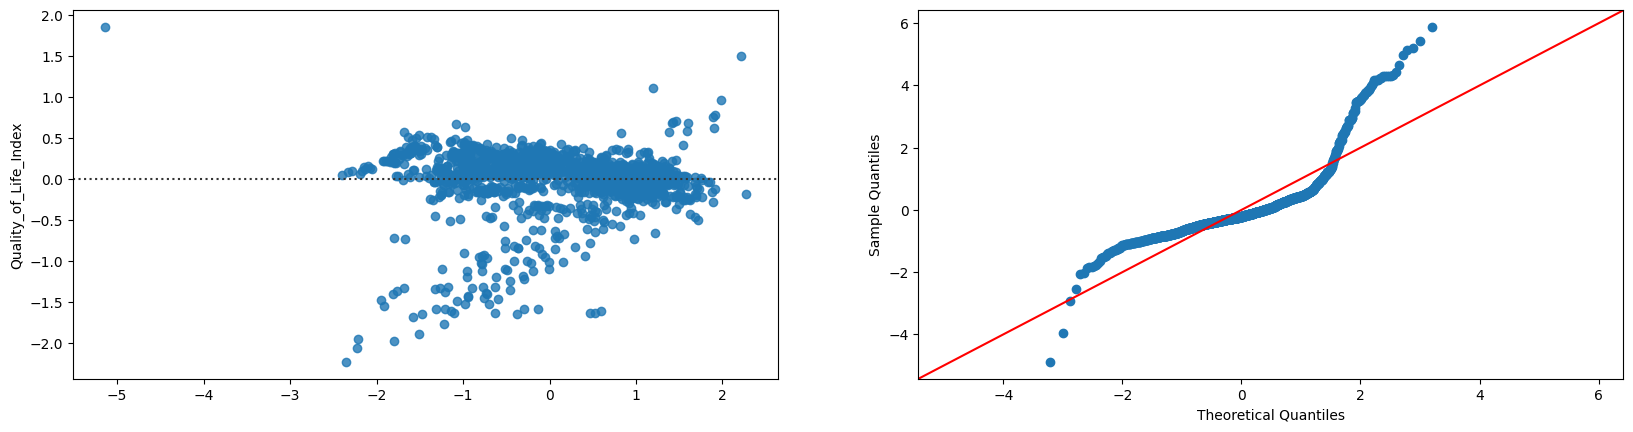

In [17]:
#otteniamo i valori predetti dal modello:


fitted_quality_index = linear_regression_model_for_quality_index.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted_quality_index, y='Quality_of_Life_Index', data=standardized_data,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted_quality_index-standardized_data['Quality_of_Life_Index'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

L'idea alla base dei modelli di regressione è che non siamo in grado di definire quale sarà l'errore della nostra predizione. 

In un residual plot abbiamo nella linea delle x i valori predetti, nelle y i residui


Vogliamo che i residui in un residual plot non seguano un determinato pattern in modo da non poter distinguere la loro distribuzione. 

Infatti se tutit i valori concentrati intornno allo 0 avessero residuo tipo 0, questo sarebbe deterministico

Per questo il nostro residual plot ci dice che il nostro modello di regressione lineare è un buon modello di regressione


Si assume spesso che i residui debbano seguire una distribuzione gaussiana. Testiamo questo con un q-qplot.

Nel nostro esempio sembra che i residui seguano una distribuzione gaussiana e quindi il nostro modello di regressione lineare sembra buono






Possiamo provare ad aggiungere ai nostri due modelli di prova dei termini di interazione per provare a trovare modelli che si adattano ancora meglio ai nostri dati.

In [18]:
def linear_regressione_with_interaction_terms (dep_var, indep_vars,data):

    terms = indep_vars


    formula = f"{dep_var} ~ " + " + ".join(indep_vars) + " + " + " + ".join([f"{i}*{j}" for i in indep_vars for j in indep_vars if i != j])

    model = ols(formula, data).fit()
    return model


# con il Rank sembra più preciso perche il range di valori del rank è molto più piccolo rispetto a quello dell'indice di qualità della vita


# questo sarebbe il modello ottimale da utilizzare ma potrebbe essere anche troppo complesso e causare overfitting
linear_regression_model_with_interaction_terms = linear_regressione_with_interaction_terms('Quality_of_Life_Index', ['Purchasing_Power_Index', 'Safety_Index', 'Health_Care_Index', 'Cost_of_Living_Index', 'Property_Price_to_Income_Ratio', 'Traffic_Commute_Time_Index', 'Pollution_Index'], standardized_data)
linear_regression_model_with_interaction_terms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Quality_of_Life_Index   R-squared:                       0.874
Model:                               OLS   Adj. R-squared:                  0.872
Method:                    Least Squares   F-statistic:                     363.2
Date:                   Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                           14:47:52   Log-Likelihood:                -572.84
No. Observations:                   1495   AIC:                             1204.
Df Residuals:                       1466   BIC:                             1358.
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -0.0293      0.018     -1.628      0.104      -0.065       0.006
Purchasing_Power_Index                                        0.3419      0.021     16.478      0.000       0.301       0.383
Safety_Index                                                  0.1510      0.014     10.957      0.000       0.124       0.178
Health_Care_Index                                             0.1232      0.014      9.038      0.000       0.096       0.150
Cost_of_Living_Index                                         -0.1533      0.017     -9.004      0.000      -0.187      -0.120
Property_Price_to_Income_Ratio                               -0.2608      0.026    -10.075      0.000      -0.312      -0.210
Traffic_Commute_Time_Index                                   -0.1108      0.015     -7.202      0.000      -0.141      -0.081
Pollution_Index                                              -0.4348      0.016    -26.433      0.000      -0.467      -0.403
Purchasing_Power_Index:Safety_Index                          -0.0624      0.018     -3.405      0.001      -0.098      -0.026
Purchasing_Power_Index:Health_Care_Index                     -0.0442      0.024     -1.823      0.069      -0.092       0.003
Purchasing_Power_Index:Cost_of_Living_Index                   0.0738      0.019      3.923      0.000       0.037       0.111
Purchasing_Power_Index:Property_Price_to_Income_Ratio         0.0229      0.022      1.060      0.289      -0.019       0.065
Purchasing_Power_Index:Traffic_Commute_Time_Index             0.0159      0.028      0.577      0.564      -0.038       0.070
Purchasing_Power_Index:Pollution_Index                       -0.0577      0.025     -2.337      0.020      -0.106      -0.009
Safety_Index:Health_Care_Index                                0.0094      0.014      0.674      0.500      -0.018       0.037
Safety_Index:Cost_of_Living_Index                             0.0568      0.019      2.963      0.003       0.019       0.094
Safety_Index:Property_Price_to_Income_Ratio                  -0.0430      0.018     -2.433      0.015      -0.078      -0.008
Safety_Index:Traffic_Commute_Time_Index                      -0.0250      0.017     -1.429      0.153      -0.059       0.009
Safety_Index:Pollution_Index                                  0.0814      0.021      3.794      0.000       0.039       0.123
Health_Care_Index:Cost_of_Living_Index                        0.0755      0.021      3.518      0.000       0.033       0.118
Health_Care_Index:Property_Price_to_Income_Ratio             -0.0120      0.020     -0.590      0.556      -0.052       0.028
Health_Care_Index:Traffic_

Anche qui possiamo interpretare i coefficienti come abbiamo interpretati prima. 

Ad esempio la variabile 'Health_Care_Index:Pollution_Index' ha coefficiente 0.0106 ed indica come l'indice di qualità della vita cambia quando il prodotto tra l'indice di buona salute e l'indice di inquinamento aumenta di una unità. 

Le stesse osservazioni possono essere fatte per gli altri rapporti tra le variabili.

I coefficienti dei termini singoli cambiano rispetto al semplice modello lineare perchè parte della varianza che dovevano catturare prima è adesso catturata dai termini d'interazione

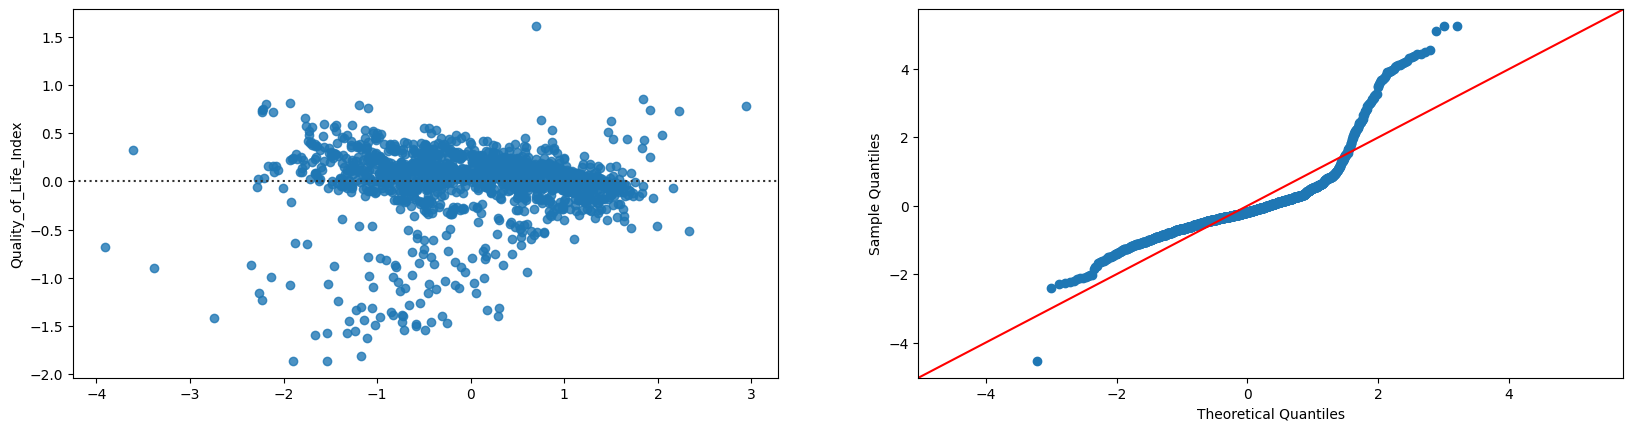

In [19]:

fitted_with_interaction_terms = linear_regression_model_with_interaction_terms.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted_with_interaction_terms, y='Quality_of_Life_Index', data=standardized_data,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted_with_interaction_terms-standardized_data['Quality_of_Life_Index'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

### REGRESSIONE PER FARE PREDIZIONI

Possiamo utilizzare la regressione per predire il valore di una certa variabile dipendente Y a partire da determinate varibiabili indipendenti.

Utilizziamo adesso i modelli di regressione già implementati da *sklearn*.




In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression, Lasso, Ridge, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPRegressor


In [21]:
# per prima cosa mi creo un dataframe  che utilizzerò per la regressione lineare

# non ci servono le colonne 'Country' e 'Year' per la regressione lineare

data_for_regression = data.drop(['Country', 'Year'], axis=1).copy()


# funzione ausiliara che ci permette di dividere dataset
def split_X_and_Y(data,dep_var):
    return data.drop(dep_var, axis=1).copy(), data[dep_var].copy()



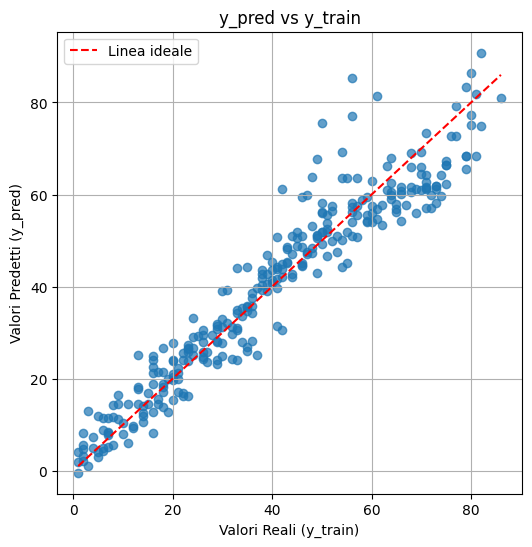

Mean Absolute Error: 4.844017151024809
Mean Squared Error: 42.611373493027244
R^2 Score: 0.912725377346246
Previsioni del rank per un nuovo dato, valore atteso 34: 
[36.59066854]


In [22]:

# possiamo utilizzare le pipeline di sklearn per semplificare il processo di addestramento e valutazione del modello


# creo regrressione lineare per il Rank, che è la variabile dipendente
X,Y = split_X_and_Y(data_for_regression,'Rank') # variabile dipendente

def linear_regression(X,Y):
    # Dividi i dati in set di training e test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    linear_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])  

    # Addestra il modello
    linear_regressor.fit(X_train, y_train)

    # Previsione
    y_pred = linear_regressor.predict(X_test)

    # Visualizza i risultati
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linea ideale')
    plt.xlabel('Valori Reali (y_train)')
    plt.ylabel('Valori Predetti (y_pred)')
    plt.title('y_pred vs y_train')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Valutazione del modello
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)   # 1- rss/tss
    mae = mean_absolute_error(y_test, y_pred)

    return mse, r2, mae,linear_regressor


mse, r2, mae, linear_regression_model_for_rank = linear_regression(X,Y)

print("Mean Absolute Error:", mae)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

new_data = pd.DataFrame({
    'Quality_of_Life_Index': [111.3],
    'Purchasing_Power_Index': [75.4],
    'Safety_Index': [82.4],
    'Health_Care_Index': [66.1],
    'Cost_of_Living_Index': [93.6],
    'Property_Price_to_Income_Ratio': [21.4],
    'Traffic_Commute_Time_Index': [44.1],
    'Pollution_Index': [40.4]
}) 


print("Previsioni del rank per un nuovo dato, valore atteso 34: ")
print(linear_regression_model_for_rank.predict(new_data)) # per fare una previsione su nuovi dati, basta passare un dataframe con le stesse colonne di X

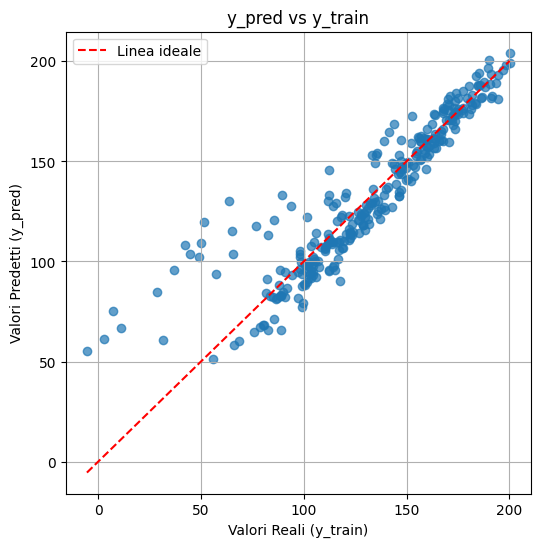

Mean Absolute Error: 10.274265501073497
Mean Squared Error: 269.8908030015901
R^2 Score: 0.82429823057402
Previsioni del rank per un nuovo dato, valore atteso 111.3: 
[136.60697814]


In [23]:
# posso fare la stessa cosa per l'indice di qualità della vita

# creo regrressione lineare per il Rank, che è la variabile dipendente
X,Y = split_X_and_Y(data_for_regression,'Quality_of_Life_Index') # variabile dipendente
X.drop('Rank', axis=1, inplace=True) # elimino la colonna Rank perche non mi serve per la regressione lineare



mse, r2, mae, linear_regression_model_for_quality_index = linear_regression(X,Y)

print("Mean Absolute Error:", mae)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

new_data = pd.DataFrame({
    'Purchasing_Power_Index': [75.4],
    'Safety_Index': [82.4],
    'Health_Care_Index': [66.1],
    'Cost_of_Living_Index': [93.6],
    'Property_Price_to_Income_Ratio': [21.4],
    'Traffic_Commute_Time_Index': [44.1],
    'Pollution_Index': [40.4]
}) 


print("Previsioni del rank per un nuovo dato, valore atteso 111.3: ")
print(linear_regression_model_for_quality_index.predict(new_data)) # per fare 

Entrambi i modelli sembrano modelli che fittano bene i nostri dati e che quindi possono essere utilizzati per predire un valore a predire da altri. 




Proviamo anche modelli alternativi. 

Potrebbe essere che modelli con equazioni polinomiali fittano meglio i nostri dati.
In questo caso abbiamo come iperparametro il grado del polinomio. 

Tramite il validation set si cerca quindi quale grado meglio fitta i dati e poi si traina il modello con quel parametro, per poi valutarlo sul test set.

In [24]:
# questa funzione è una dimostrazione grezza di come si può implementare una regressione polinomiale
# polinomiale in sklearn, ma non è il modo migliore per farlo, in quanto non utilizza la cross validation
# qui risulta essere utile il validation set

def polinomial_regression(range, X,Y):

   # Dividi i dati in set di training e test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler() # inizializza lo scaler
    scaler.fit(X_train) # tunes the internal parameters of the standard scaler
    
    # scaler.fit(X_train) # tunes the internal parameters of the standard scaler
    X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2/(1-0.2), random_state=42)

    # X_val = scaler.transform(X_val)
    # X_train_v = scaler.transform(X_train_v)

    X_train = pd.DataFrame(scaler.transform(X_train),columns = X.columns) # does not tune the parameters anymore
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns) # does not tune the parameters anymore
    X_val = pd.DataFrame(scaler.transform(X_val), columns = X.columns) # does not tune the parameters anymore

    best_degree = -5
    best_r2 = -1
         # normalmente quello pià grande ma avremmo overfitting -> come scelgo quello ceh ci garantisce bias
    for degree in range:
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            poly.fit(X_train)
            X_train_poly = poly.transform(X_train)

            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            # sul grado faccio cross validation per trovare il grado migliore, poi uso il modello con quel grado e quell'alpha
            y_val_pred = model.predict(poly.transform(X_val))
            
            # Valuta il modello
            mse = mean_squared_error(y_val, y_val_pred)
            r2 = r2_score(y_val, y_val_pred)   # 1- rss/tss
            mae = mean_absolute_error(y_val, y_val_pred)

        

            best_model = None
            best_poly = None
             # sulla base di r2 prendo il best_degree 
            if r2 > best_r2 :
                best_r2 = r2
                best_degree = degree 
                best_model = model
                best_poly = poly

    return best_model, best_degree, best_r2

 
X,Y = split_X_and_Y(data_for_regression,'Rank') # variabile dipendente

print("Migliore grado di polinomio per il ranking: ")
print(polinomial_regression(range(1,4), X,Y))


X,Y = split_X_and_Y(data_for_regression,'Quality_of_Life_Index') # variabile dipendente
X.drop('Rank', axis=1, inplace=True) # elimino la colonna Rank perche non mi serve per la regressione polinomiale


# auamentiamo l'r2 score per predire l'indice di qualità della vita con un modello polinomiale
print("\n Migliore grado di polinomio per il quality index: ")
print(polinomial_regression(range(1,4),  X,Y))
# qui notiamo he più aumentiamo più avremmo overfitting , il grado migliore sarà sempre quello più alto
# questo non è un modo giusto per trovare il grado migliore, ma è un modo semplice per capire come funziona la regressione polinomiale


Migliore grado di polinomio per il ranking: 
(LinearRegression(), 3, 0.9788095186549006)

 Migliore grado di polinomio per il quality index: 
(LinearRegression(), 3, 0.9233192453177409)


Notiamo che il miglior grado è sempre quello maggiore.

Questo potrebbe portare ad avere un overfitting del modello sui dati.

Una tecnica che viene spesso usata è la Ridge Regression, ovvero la penalizzazione della loss function in modo da penalizzare determinati attirbuti così che i loro coefficienti  tendano a zero.

La Ridge regression dipende da un altro iperparameto.

Per poter ottenere gli iperparametri ottimali per i nostri algoritmi si utilizza spesso la Grid Search

Effttuiaamo quindi la Ridge Regression polinomiale sui migliori parametri che abbiamo trovato con la grid search

In [25]:
# tolgot direttamente tutto


# def grid_regularized_polinomial_regression(X_train,degree,params):
        


#         poly = PolynomialFeatures(degree=degree, include_bias=False)
#         poly.fit(X_train)

        
#         X_train_poly = poly.transform(X_train)

#         # Inizializza e addestra il modello di regressione lineare
#         #model = Lasso(alpha)   # con alpha=1 dovrei ottenere gli stessi risultati di prima

#         model = Lasso(random_state=0)  # Inizializza il modello di regressione Lasso con un valore di alpha iniziale
#         #model.fit(X_train_poly, y_train)

#         grid_search = GridSearchCV(model, param_grid=params, cv=5)
#         grid_search.fit(X_train_poly, y_train)

#         print("Migliore alpha:", grid_search.best_params_)
#         print("Miglior score:", grid_search.best_score_)

#         alpha = grid_search.best_params_['alpha']


#         model_s = Lasso(alpha) 
#         model_s.fit(X_train_poly, y_train)

#             # sul grado faccio cross validation per trovare il grado migliore, poi uso il modello con quel grado e quell'alpha
#         y_val_pred = model_s.predict(poly.transform(X_val))
            
#             # Valuta il modello
#         mse = mean_squared_error(y_val, y_val_pred)
#         r2 = r2_score(y_val, y_val_pred)   # 1- rss/tss
#         mae = mean_absolute_error(y_val, y_val_pred)

#         return mse, r2, mae, model_s

Vediamo come risulta essere più semplice concatenare tramite una Pipeline Sklearn.

Da questa pipeline passeranno i nostri dati ed alla fine avremo trainato il nostro modello.

Definiamo la nostra pipeline per la Ridge Regression. Ci servirà per fare grid search affinchè troviamo gli iperparametri.

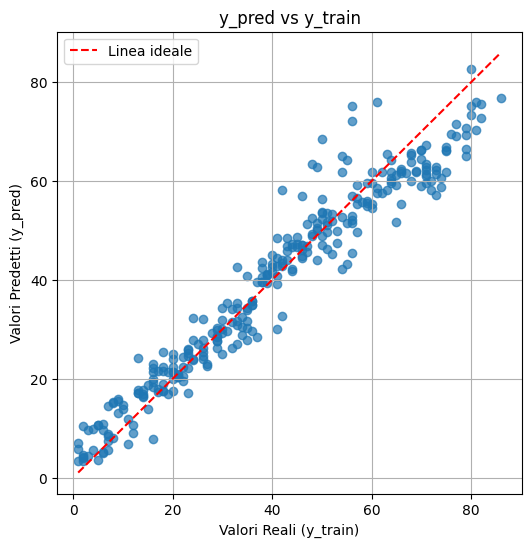

Mean Absolute Error: 4.343810079932886
Mean Squared Error: 33.46337785847439
R^2 Score: 0.9314618742388993
Valore atteso 34: 
[38.88982432]


In [26]:
# Nel caso di polinomi molto larghi il rischio di overfitting è lto quindi si usano ridge e lasso regression
# ridge regression penalizza i coefficienti più grandi e quindi tende a ridurli (cercando di metterli a 0 elimina le variabili che si pensa sono correlate)


# proviamo con la pipeline di scikit-learn
def polynomial_regression(X,Y):

    polynomial_regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomial_expansion', PolynomialFeatures()),
    ('ridge_regression', Ridge())
     ])
    # We use the notation "object__parameter" to identify parameter names
    polynomial_regressor.set_params(polynomial_expansion__degree=2, ridge_regression__alpha=300)

    # Dividi i dati in set di training e test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    polynomial_regressor.fit(X_train, y_train)

    y_pred = polynomial_regressor.predict(X_test)

    # Visualizza i risultati
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linea ideale')
    plt.xlabel('Valori Reali (y_train)')
    plt.ylabel('Valori Predetti (y_pred)')
    plt.title('y_pred vs y_train')
    plt.legend()
    plt.grid(True)
    plt.show()

 # Valutazione del modello
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)   # 1- rss/tss
    mae = mean_absolute_error(y_test, y_pred)
    return  mae,r2,mse,polynomial_regressor



X,Y = split_X_and_Y(data_for_regression,'Rank') # variabile dipendente


mae,r2,mse,polynomial_regressor = polynomial_regression(X,Y)
print("Mean Absolute Error:", mae)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")





# sipuò fare con pipeline
new_data = pd.DataFrame({
    'Quality_of_Life_Index': [111.3],
    'Purchasing_Power_Index': [75.4],
    'Safety_Index': [82.4],
    'Health_Care_Index': [66.1],
    'Cost_of_Living_Index': [93.6],
    'Property_Price_to_Income_Ratio': [21.4],
    'Traffic_Commute_Time_Index': [44.1],
    'Pollution_Index': [40.4]
}) 



print("Valore atteso 34: ")
print(polynomial_regressor.predict(new_data)) # per fare una previsione su nuovi dati, basta passare un dataframe con le stesse colonne di X



In [27]:
# si fa grid search per trovare i migliori iperparametri
# utilizziamo la grid per trovare alpha e  ( lo facciamo sul grado 2 in questo caso)




def grid_search_ridge_regression(X,Y):

    gs = GridSearchCV(polynomial_regressor, param_grid={'polynomial_expansion__degree':range(0,5), 'ridge_regression__alpha':range(200,400,25)}, scoring=make_scorer(mean_squared_error,greater_is_better=False))



    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


    gs.fit(X_train, y_train)

    print(gs.best_params_)

    # We use the notation "object__parameter" to identify parameter names
    polynomial_regressor.set_params(**gs.best_params_)


    polynomial_regressor.fit(X_train, y_train)
    y_pred = polynomial_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)   # 1- rss/tss
    mae = mean_absolute_error(y_test, y_pred)  

    return mse,r2,mae,polynomial_regressor

X,Y = split_X_and_Y(data_for_regression,'Rank') # variabile dipendente

mse,r2,mae,polynomial_regressor = grid_search_ridge_regression(X,Y)

print("Mean Absolute Error:", mae)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# sipuò fare con pipeline
new_data = pd.DataFrame({
    'Quality_of_Life_Index': [111.3],
    'Purchasing_Power_Index': [75.4],
    'Safety_Index': [82.4],
    'Health_Care_Index': [66.1],
    'Cost_of_Living_Index': [93.6],
    'Property_Price_to_Income_Ratio': [21.4],
    'Traffic_Commute_Time_Index': [44.1],
    'Pollution_Index': [40.4]
}) 



print("Valore atteso 34: ")
print(polynomial_regressor.predict(new_data))



/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lorenzodidomenico/Desktop/Co

{'polynomial_expansion__degree': 3, 'ridge_regression__alpha': 275}
Mean Absolute Error: 4.229390092926691
Mean Squared Error: 34.2699045817034
R^2 Score: 0.9298099839180791
Valore atteso 34: 
[41.61565124]


Un altro metodo di regressione offerto da Sklearn è la MLPRegression



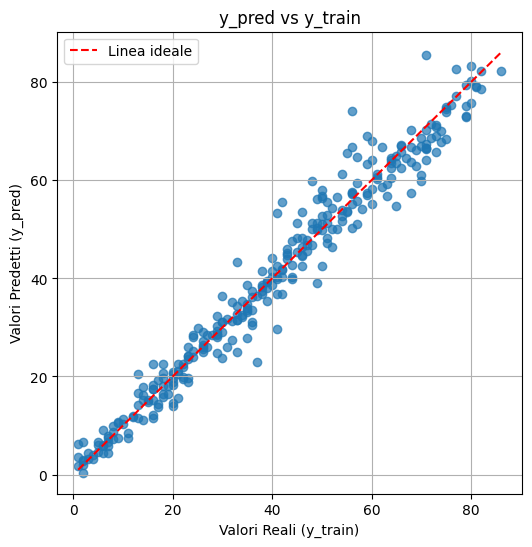

Mean Absolute Error: 2.863764335874042
Mean Squared Error: 16.745678037774045
R^2 Score: 0.9657022852814839
Valore atteso 34: 
[41.06837645]


In [28]:

def mlp_regressor(X,Y):


    mlp_regressor = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp_regression', MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.01))
    ])

   # Dividi i dati in set di training e test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



    mlp_regressor.fit(X_train,y_train)

    y_pred =mlp_regressor.predict(X_test)


    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linea ideale')
    plt.xlabel('Valori Reali (y_train)')
    plt.ylabel('Valori Predetti (y_pred)')
    plt.title('y_pred vs y_train')
    plt.legend()
    plt.grid(True)
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)   # 1- rss/tss
    mae = mean_absolute_error(y_test, y_pred)


    return mse,r2,mae,mlp_regressor


X,Y = split_X_and_Y(data_for_regression,'Rank')
mse,r2,mae,mlp_regressor = mlp_regressor(X,Y)

print("Mean Absolute Error:", mae)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# sipuò fare con pipeline
new_data = pd.DataFrame({
    'Quality_of_Life_Index': [111.3],
    'Purchasing_Power_Index': [75.4],
    'Safety_Index': [82.4],
    'Health_Care_Index': [66.1],
    'Cost_of_Living_Index': [93.6],
    'Property_Price_to_Income_Ratio': [21.4],
    'Traffic_Commute_Time_Index': [44.1],
    'Pollution_Index': [40.4]
}) 



print("Valore atteso 34: ")
print(mlp_regressor.predict(new_data))


# faccio confronto fra tutti quelli trovati e poi utilizzo il modello per fare predizioni

dico cosa è MLP regressor

Se plotto qui i dati predetti rispetto ai dati di test vediamo che sono molto vicini

In [29]:
# di questo potrei vedere per il validation set quella cosa che fa il professore

### CLASSIFICAZIONE 


Il dataset non dispone di variabili utili alla classificazione.

Creo una nuova colonna Status sulla base dei parametri dell'inquinamento

Prima vedo min e max dell'inquinamento e poi divido questa in 3 categorie

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.formula.api import mnlogit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB


In [31]:
data_for_classification = data.copy()

In [32]:
data_for_classification = data.drop(['Rank','Country','Year'],axis=1).copy()

# faccio questi 3 range 

creo una nuova colonna nel dataset che diano una categoria alla nazione in base al pollution index

In [33]:
data_for_classification['Status'] = pd.qcut(data_for_classification['Quality_of_Life_Index'], q=3, labels=['Basso', 'Medio', 'Alto'])
# se il dato ha quality_ o_life index tra i dati del primo quartile statua 1 basso, sennò statua 2 medio, altiremnti status 3 alto


data_for_classification['Status'] = data_for_classification['Status'].replace({'Alto':0, 'Medio':1, 'Basso':2}).infer_objects(copy=False)

print('Il dataset usato per la classificazione è quindi il seguente: ')
data_for_classification.head(10)



Il dataset usato per la classificazione è quindi il seguente: 


/var/folders/kq/5f8v4_k93jv_j6g7clmj164w0000gn/T/ipykernel_5850/1093916610.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_for_classification['Status'] = data_for_classification['Status'].replace({'Alto':0, 'Medio':1, 'Basso':2}).infer_objects(copy=False)
/var/folders/kq/5f8v4_k93jv_j6g7clmj164w0000gn/T/ipykernel_5850/1093916610.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_for_classification['Status'] = data_for_classification['Status'].replace({'Alto':0, 'Medio':1, 'Basso':2}).infer_objects(copy=False)


Quality_of_Life_Index  Purchasing_Power_Index  Safety_Index  \
0                  222.9                   146.5          73.2   
1                  195.9                   111.8          71.5   
2                  193.9                   110.9          57.9   
3                  192.5                   126.1          50.0   
4                  190.2                   101.2          70.5   
5                  190.2                   105.7          74.3   
6                  182.6                   104.6          73.8   
7                  180.8                   110.4          57.8   
8                  177.6                   105.1          62.5   
9                  175.5                    91.0          60.2   

   Health_Care_Index  Cost_of_Living_Index  Property_Price_to_Income_Ratio  \
0               66.3                 126.0                             7.3   
1               75.6                  76.3                             6.6   
2               76.3                  82.9                             9.2   
3               67.8                  76.5                             2.6   
4               69.4                  89.7                             7.0   
5               79.3                 100.6                             5.0   
6               78.4                  76.9                             9.6   
7               71.9                  99.3                             7.1   
8               69.6                  81.8                             5.5   
9               72.6                  93.7                             5.8   

   Traffic_Commute_Time_Index  Pollution_Index Status  
0                        25.6             24.1      0  
1                        31.1             28.3      0  
2                        26.9             15.1      0  
3                        36.0             31.4      0  
4                        33.2             14.9      0  
5                        27.8             31.8      0  
6                        25.9             34.0      0  
7                        36.2             21.6      0  
8                        38.9             27.3      0  
9                        28.1             17.6      0

In [34]:

def classify_with_logistic_regression(X,Y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
    logistic_regressor = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000) )
    ])

    logistic_regressor.fit(X_train, y_train)


    y_pred = logistic_regressor.predict(X_test)


    return y_test, y_pred , logistic_regressor



X,Y = split_X_and_Y(data_for_classification,'Status')

# sistemare questo
X.drop(['Quality_of_Life_Index'],axis=1,inplace=True)


y_test,y_pred,logistic_regressor = classify_with_logistic_regression(X,Y)


# y_test,y_pred,logistic_regressor = classify_with_logistic_regression(X,Y)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print(""" Questa matrice di confusione possiamo interpretarla così: 
      
      Il numero di righe che presentan status Alto classificate come Status Alto sono 85
      Il numero di righe che presentano status Medio classificate come Status Medio sono 81
      Il numero di righe che presentano status Basso classificate come Status Basso sono 90

      Quindi l'accuracy in generale è 85+81+90/(85+81+90+7+8+11+17) = 0.87

      Da questo possiamo ottenere pure il tasso di errore: 0.13


      Possiamo ottenere tramite il classification report anche  la precision e la recall (accuracy)

      Ad esempio la precision per status Alto indica TA / TA + FP + FP = 85 / 85+8 = 0.91, MENTRE CON 85/85+7 otteniamo l'accuracy


      Questo anche per le altre classi
      \n""")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Green', 'Yellow', 'Red']))






# sipuò fare con pipeline
new_data = pd.DataFrame({
    'Purchasing_Power_Index': [0],
    'Safety_Index': [0],
    'Health_Care_Index': [0],
    'Cost_of_Living_Index': [0],
    'Property_Price_to_Income_Ratio': [0],
    'Traffic_Commute_Time_Index': [0],
    'Pollution_Index': [0]
}) 

print(logistic_regressor.predict(new_data))


Confusion Matrix:
[[85  7  0]
 [ 8 81 11]
 [ 0 17 90]]
 Questa matrice di confusione possiamo interpretarla così: 

      Il numero di righe che presentan status Alto classificate come Status Alto sono 85
      Il numero di righe che presentano status Medio classificate come Status Medio sono 81
      Il numero di righe che presentano status Basso classificate come Status Basso sono 90

      Quindi l'accuracy in generale è 85+81+90/(85+81+90+7+8+11+17) = 0.87

      Da questo possiamo ottenere pure il tasso di errore: 0.13


      Possiamo ottenere tramite il classification report anche  la precision e la recall (accuracy)

      Ad esempio la precision per status Alto indica TA / TA + FP + FP = 85 / 85+8 = 0.91, MENTRE CON 85/85+7 otteniamo l'accuracy


      Questo anche per le altre classi
      


Classification Report:
              precision    recall  f1-score   support

       Green       0.91      0.92      0.92        92
      Yellow       0.77      0.81      0.79       100


/Users/lorenzodidomenico/Desktop/CountriesQualityOfLifeAnalysis/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Per ottenere i coefficienti della regressione logistica e dare un interpretazione statistica ad essi possiamo utilizzare la mnlogit di statsmodels

In [35]:

data_for_classification['Status'] = data_for_classification['Status'].astype(int)
model = mnlogit('Status~ Purchasing_Power_Index + Safety_Index + Health_Care_Index + Cost_of_Living_Index + Property_Price_to_Income_Ratio + Traffic_Commute_Time_Index + Pollution_Index', data=data_for_classification).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.287059
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                 Status   No. Observations:                 1495
Model:                        MNLogit   Df Residuals:                     1479
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.7387
Time:                        14:47:57   Log-Likelihood:                -429.15
converged:                       True   LL-Null:                       -1642.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      Status=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          3.1825      1.666      1.911    

In [36]:
# posso utilizzare np.exp(model.params)  per ottenere questi valori elevati però modificare nomi colonne

status = 0 come linea di base

intercetta per status=1 è 3.18 -> la probabilità di medio rispetto a alto è e^3.18 quando tutte le variabili sono a 0. è un numero molto gradne perche è banale questo

intercetta per status=2 è -1.0142 -> la probabilià di basso rispetto a alto è e -1,042 quando tutte le variabili sono a 0. questo è un numero basso

il coefficiente di  -0.1079 per status=1 di purchasing index inidca che quando osserviamo un aumento di 1 del purcahing la probabilità di medio rispetto a alto diminuisce del e*-0,1079  = 0.89, quindi un decremento del 11% 


se aumnenta il costo della vita la provabilità che medio rispetto a alto aumenta (>1)

se aumenta di 1 il property price to income rati la probabilità che basso rispetto a alto aumenta del e^0.37 -> aumenta del 61%

se aumenta la pollution index sia le probabilitàà di basso che di medio rispetto ad alto si alzano.




finisco questo faccio altre conclusioni e chiedo per ricevimento



In [37]:
# posso fare anche lda sul dataset per la classificazine

#LDA fa trasformazione in spazio lineare e poi applichiamo naive bayes

# vediamo che accuracy otteniamo



In [38]:

lda = LDA()

data_for_classification.drop('Quality_of_Life_Index',axis=1,inplace=True)

lda.fit(data_for_classification.drop('Status',axis=1),data_for_classification['Status'])


data_lda=lda.transform(data_for_classification.drop('Status',axis=1))


print(data_lda.shape)

(1495, 2)


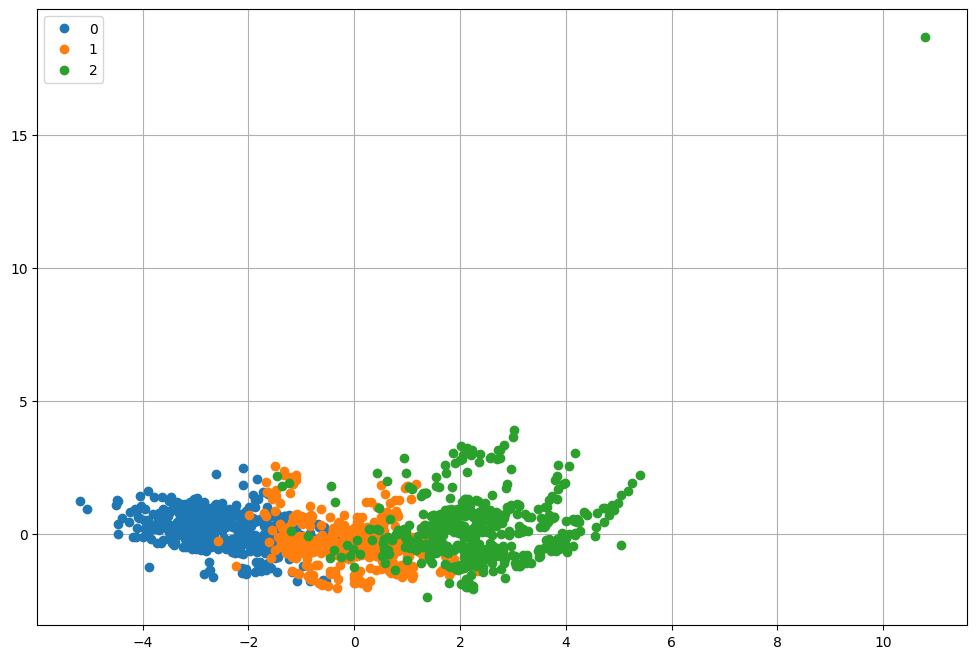

In [39]:
plt.figure(figsize=(12,8))
#otteniamo le tre classi uniche dal dataset
classes = np.unique(data_for_classification['Status'])
for s in classes:
    class_data = data_lda[data_for_classification['Status']==s]
    plt.plot(class_data[:,0],class_data[:,1],'o')
plt.grid()
plt.legend(classes)
plt.show()

In [40]:

model = GaussianNB()
model.fit(data_lda,data_for_classification['Status'])
print("Accuracy: %0.2f" % model.score(data_lda,data_for_classification['Status']))

print("L'accuracy non è male , potrebbe quindi il modello essere usato per classificare se dati certi dati la nazione ha status alto, medio o basso")

Accuracy: 0.88
L'accuracy non è male , potrebbe quindi il modello essere usato per classificare se dati certi dati la nazione ha status alto, medio o basso


In [41]:
# sipuò fare con pipeline
new_data = pd.DataFrame({
    'Purchasing_Power_Index': [146.5],
    'Safety_Index': [73.2],
    'Health_Care_Index': [66.3],
    'Cost_of_Living_Index': [126.0],
    'Property_Price_to_Income_Ratio': [7.3],
    'Traffic_Commute_Time_Index': [25.6],
    'Pollution_Index': [24.1]
}) 

# sipuò fare con pipeline
# new_data = pd.DataFrame({
#     'Purchasing_Power_Index': [0],
#     'Safety_Index': [0],
#     'Health_Care_Index': [0],
#     'Cost_of_Living_Index': [0],
#     'Property_Price_to_Income_Ratio': [0],
#     'Traffic_Commute_Time_Index': [0],
#     'Pollution_Index': [0]
# }) 

In [42]:

new_data_lda = lda.transform(new_data)
print(new_data_lda)
print(model.predict(new_data_lda))

[[-3.71809197  0.63650285]]
[0]


possiamo quindi usare LDA per classificare il nostor dataset

## CONCLUSIONI

Le conclusioni che sono uscite da questo progetto